In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import joblib

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/website_classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/website_classification


##### Data preparation

In [7]:
# bring data set
website_ds = pd.read_csv('dataset.csv')

# verify
website_ds.groupby('label').head(2)

,file_name,label,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_8810,x_8811,x_8812,x_8813,x_8814,x_8815,x_8816,x_8817,x_8818,x_8819
0,amazon00.png,amazon,0.379437,0.36479,0.028076,0.379437,0.379437,0.379437,0.357514,0.379437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,amazon01.png,amazon,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
260,bbc00.png,bbc,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
261,bbc01.png,bbc,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
522,cnn00.png,cnn,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
523,cnn01.png,cnn,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
787,ebay00.png,ebay,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.272831,0.000000,0.000000,0.000000,0.047093,0.960016,0.000000,0.000000,0.000000,0.041418
788,ebay01.png,ebay,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.272831,0.000000,0.000000,0.000000,0.047093,0.960016,0.000000,0.000000,0.000000,0.041418
1049,github100.png,github,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1050,github101.png,github,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# splitting the data set. The test set will be used only to validate the final model performance
website_train, website_test = train_test_split(website_ds, test_size=.2, random_state=42)

##### Feature selection

In [9]:
# we will use a subset of training set to accelerate feature selection execution. We will then use the whole training set the train the model.
website_train_subset = website_train.sample(frac=.1, random_state=2)

In [10]:
website_features_subset = website_train_subset.drop(["label", "file_name"], axis=1)
n_features = website_features_subset.shape[1]
website_labels_subset = website_train_subset["label"].copy()
website_meta_subset = website_train_subset[["file_name"]].copy()

Classifiers (SGD, SVM, etc) are pretty sensitive to data scaling so we scale the training set.

It is important to keep this scaling as it is the same that has to be applied on the test set or during the real classification task.

In [11]:
scaler = StandardScaler().fit(website_features_subset)
website_features_scaled_subset = pd.DataFrame(scaler.transform(website_features_subset), columns=website_features_subset.columns.values)
print(website_features_scaled_subset)

          x_0       x_1       x_2       x_3       x_4       x_5       x_6  \
0   -0.686405 -0.250642 -0.309715 -0.409580  4.144339  0.916351 -0.387424   
1   -0.686405 -0.250642 -0.309715 -0.409580 -0.364741 -0.921390 -0.387424   
2   -0.686405 -0.250642 -0.309715 -0.409580 -0.364741 -0.921390 -0.387424   
3   -0.686405 -0.250642 -0.309715 -0.409580 -0.364741  1.677569 -0.387424   
4   -0.686405 -0.250642 -0.309715 -0.409580 -0.364741  1.677569 -0.387424   
..        ...       ...       ...       ...       ...       ...       ...   
202 -0.686405 -0.250642 -0.309715 -0.409580 -0.364741 -0.921390 -0.387424   
203 -0.686405 -0.250642 -0.309715 -0.409580 -0.364741 -0.921390 -0.387424   
204  1.260149 -0.250642 -0.309715  2.429039 -0.364741  0.497616  2.305781   
205  0.666357  4.028357 -0.071936  2.447701  2.054854  0.064751  2.755169   
206 -0.686405 -0.250642 -0.309715 -0.409580 -0.364741 -0.921390 -0.387424   

          x_7       x_8       x_9  ...    x_8810    x_8811    x_8812  \
0  

Then, we perform a recursive feature elimination with cross-validation to determine the best number of features to keep.

In [12]:
svc = SVC(kernel="linear")
rfecv = RFECV(
    estimator=svc,
    n_jobs=-1,
    verbose=1)
rfecv.fit(website_features_scaled_subset, website_labels_subset)

Streaming output truncated to the last 5000 lines.
Fitting estimator with 5287 features.
Fitting estimator with 5286 features.
Fitting estimator with 5285 features.
Fitting estimator with 5284 features.
Fitting estimator with 5283 features.
Fitting estimator with 5282 features.
Fitting estimator with 5281 features.
Fitting estimator with 5280 features.
Fitting estimator with 5279 features.
Fitting estimator with 5278 features.
Fitting estimator with 5277 features.
Fitting estimator with 5276 features.
Fitting estimator with 5275 features.
Fitting estimator with 5274 features.
Fitting estimator with 5273 features.
Fitting estimator with 5272 features.
Fitting estimator with 5271 features.
Fitting estimator with 5270 features.
Fitting estimator with 5269 features.
Fitting estimator with 5268 features.
Fitting estimator with 5267 features.
Fitting estimator with 5266 features.
Fitting estimator with 5265 features.
Fitting estimator with 5264 features.
Fitting estimator with 5263 features.

RFECV(estimator=SVC(kernel='linear'), n_jobs=-1, verbose=1)

In [13]:
joblib.dump(rfecv, 'best_rfecv.joblib')

['best_rfecv.joblib']

Optimal number of features :  287


<ErrorbarContainer object of 3 artists>

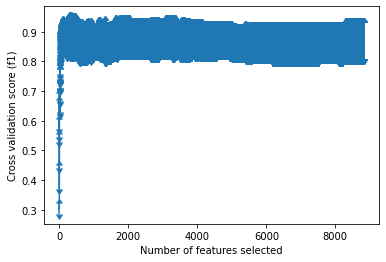

In [14]:
print("Optimal number of features : ", rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
plt.errorbar((np.arange(1, n_features+1,1)),
    rfecv.cv_results_["mean_test_score"], yerr = rfecv.cv_results_["std_test_score"], uplims=True, lolims=True)

##### Model training and Hyperparameters

From the reduced subset, we will train multiple types of SVM with different hyperparameters to determine the best possible configuration for the classifier.

In [15]:
website_features = website_train.drop(["label", "file_name"], axis=1)
website_labels = website_train["label"].copy()
website_meta = website_train[["file_name"]].copy()

In [16]:
# scaling and removing the features discarded by the RFECV.
scaler = StandardScaler().fit(website_features)
website_features_scaled = pd.DataFrame(scaler.transform(website_features), columns=website_features.columns.values)
website_features_reduced = rfecv.transform(website_features_scaled)

Perform a GridSearch on hyperparameters to configure the optimal classifier.

In [17]:
# since they allow to create a probability model, loss="log" and loss="modified_huber" are more suitable for one-vs-all classification.
# also https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use
param_grid = [
              {'alpha':10.0**-np.arange(1,7), 'loss':['log', 'modified_huber']}
]

classifier = SGDClassifier()
grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='f1', return_train_score=True, n_jobs=-1, verbose=5)
grid_search.fit(website_features_reduced, website_labels)
joblib.dump(grid_search, 'grid_search_result.joblib')
joblib.dump(grid_search.best_estimator_, 'sgd_best.joblib')

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


['sgd_best.joblib']

Optimal parameter set :  {'alpha': 0.1, 'loss': 'log'}


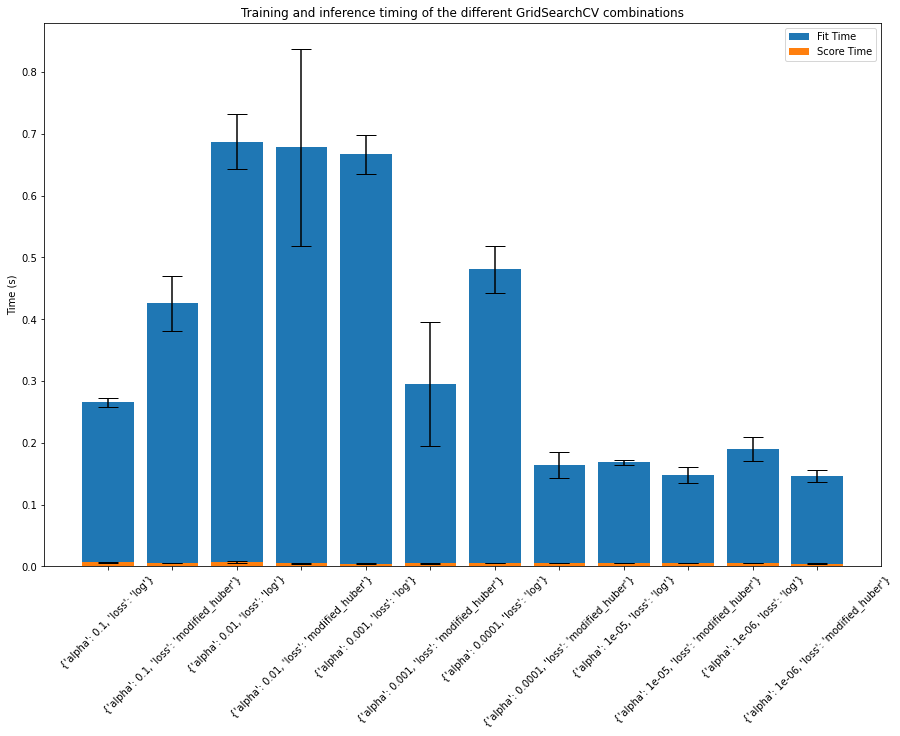

[0.00620635 0.00518187 0.00658758 0.00519141 0.00449785 0.0046219
 0.00474373 0.00513466 0.00479571 0.00485937 0.00478601 0.00444015]


In [18]:
grid_search = joblib.load('grid_search_result.joblib')
params_set = grid_search.cv_results_['params']
mean_test_score = grid_search.cv_results_['mean_test_score']
std_test_score = grid_search.cv_results_['std_test_score']

mean_fit_time = grid_search.cv_results_['mean_fit_time']
std_fit_time = grid_search.cv_results_['std_fit_time']
mean_score_time = grid_search.cv_results_['mean_score_time']
std_score_time = grid_search.cv_results_['std_score_time']


print("Optimal parameter set : ", grid_search.best_params_)

x_pos = np.arange(len(mean_fit_time))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x_pos, mean_fit_time, yerr=std_fit_time, align='center', capsize=10, label='Fit Time')
ax.bar(x_pos, mean_score_time, yerr=std_score_time, align='center', capsize=10, label='Score Time')
ax.set_ylabel('Time (s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(params_set, rotation=45)
ax.set_title('Training and inference timing of the different GridSearchCV combinations')
plt.legend()
plt.show()

print(mean_score_time)

Finally, we create a pipeline composed with the scaling, feature selection and model that we'll export to be able to apply it to new data from another notebook.

In [19]:
pipeline = Pipeline(
    [
     ('scaler', scaler), 
     ('feature_selection', rfecv), 
     ('classifier', grid_search.best_estimator_)
    ]
)

joblib.dump(pipeline, 'sgd_best_pipeline.joblib')

['sgd_best_pipeline.joblib']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


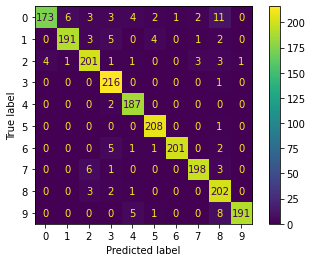

In [20]:
pipe = joblib.load('sgd_best_pipeline.joblib')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pipeline_predict = pipe.predict(website_features)

pipeline_cm = confusion_matrix(website_labels, pipeline_predict)

pipeline_disp = ConfusionMatrixDisplay(pipeline_cm)

pipeline_disp.plot()

plt.show()

##### Evaluation of the classifier on the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

      amazon       1.00      0.89      0.94        55
         bbc       0.96      0.86      0.91        56
         cnn       0.87      0.96      0.91        50
        ebay       0.86      0.98      0.92        45
      github       0.97      0.97      0.97        59
      google       0.80      1.00      0.89        43
    njuskalo       1.00      0.98      0.99        56
     spiegel       0.96      0.91      0.93        53
 theguardian       0.93      0.93      0.93        55
     youtube       1.00      0.87      0.93        46

    accuracy                           0.93       518
   macro avg       0.93      0.93      0.93       518
weighted avg       0.94      0.93      0.93       518



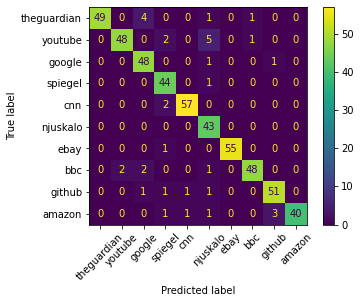

In [29]:
pipe = joblib.load('sgd_best_pipeline.joblib')

# Classifier evaluation on the test set
website_features_test = website_test.drop(["label", "file_name"], axis=1)
website_labels_test = website_test["label"].copy()
target_names = list(set(website_labels_test))
website_meta_test = website_test[["file_name"]].copy()

pipeline_predict = pipe.predict(website_features_test)
pipeline_cm = confusion_matrix(website_labels_test, pipeline_predict)
pipeline_disp = ConfusionMatrixDisplay(pipeline_cm, display_labels=target_names)

pipeline_disp.plot()

pipeline_report = classification_report(website_labels_test, pipeline_predict)
print(pipeline_report)
plt.xticks(rotation=45)
plt.show()